**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df = pd.read_csv('cleaned_data.csv')

In [4]:
features_response = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

In [5]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

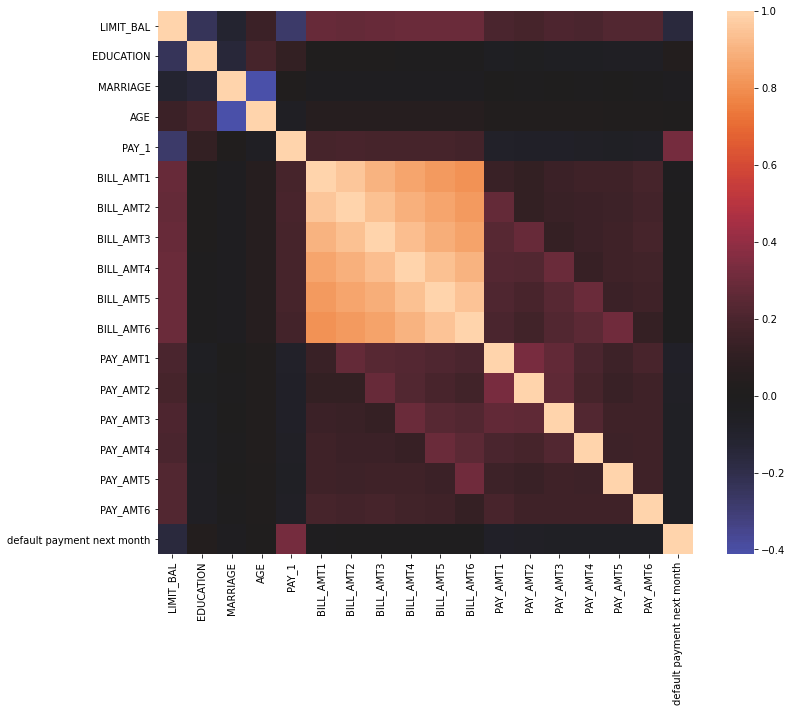

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           center = 0)
plt.show()

In [14]:
# Define the sigmoid function
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [15]:
# Create a train/test split
from sklearn.model_selection import train_test_split

X = df[['PAY_1', 'LIMIT_BAL']]
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21331, 2), (21331,), (5333, 2), (5333,))

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [17]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [18]:
# Fit the logistic regression model on training data
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [20]:
# Make predictions using `.predict()`
predictions = lr_model.predict(X_test)
predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [21]:
# Find class probabilities using `.predict_proba()`
y_proba = lr_model.predict_proba(X_test)
y_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [ ]:
# Add column of 1s to features


In [22]:
# Get coefficients and intercepts from trained model
coef = lr_model.coef_
intercept = lr_model.intercept_

In [23]:
# Manually calculate predicted probabilities
manual_y_proba = sigmoid((coef * X_test.values) + intercept)
manual_y_proba

array([[0.5       , 0.25173076],
       [0.5       , 0.415703  ],
       [0.5       , 0.20395547],
       ...,
       [0.5       , 0.415703  ],
       [0.5       , 0.17278502],
       [0.5       , 0.33606565]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [24]:
# Manually calculate predicted classes
threshold = 0.5
manual_y_pred = []

for i in manual_y_proba[:, 1]:
    if i >= threshold:
        manual_y_pred.append(1)
    else:
        manual_y_pred.append(0)

manual_y_pred = np.asarray(manual_y_pred)        

manual_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# Compare to scikit-learn's predicted classes
pos = predictions == 1
neg = predictions == 0
manual_pos = manual_y_pred == 1
manual_neg = manual_y_pred == 0
print(f"Positives = {sum(pos)} and Negatives = {sum(neg)} are predicted classes.")
print(f"Positives = {sum(manual_pos)} and Negatives = {sum(manual_neg)} are maually predicted classes.")

Positives = 0 and Negatives = 5333 are predicted classes.
Positives = 0 and Negatives = 5333 are maually predicted classes.


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [27]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics

print(f"ROC AUC Score for predicted probabilities: {metrics.roc_auc_score(y_test, y_proba[:, 1])}")

ROC AUC Score for predicted probabilities: 0.627207450280691


In [28]:
# Use manually calculated predicted probabilities to calculate ROC AUC
print(f"ROC AUC Score for manually predicted probabilities: {metrics.roc_auc_score(y_test, manual_y_proba[:, 1])}")


ROC AUC Score for manually predicted probabilities: 0.6201990844642832
